In [1]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. drinks.csv 파일 로드
2. 'beer_serving', 'spirit_serving', 'wine_serving', 'total_litres_of_alcohol' 컬럼의 데이터 간의 상관관계 출력
3. 행렬 히트맵 시각화
4. 국가별 술 소비량 대비 알콜 비율 컬럼 추가
5. 국가별 순위 시각화 (우리나라의 소비량을 표시)

In [3]:
#1 파일 로드
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [7]:
# 상관계수 행렬 출력
# 상관계수란 1에 가까울수록 관계가 있음을 나타내는 지표
corr = drinks[
    ['beer_servings',
     'spirit_servings',
     'wine_servings',
     'total_litres_of_pure_alcohol']
].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

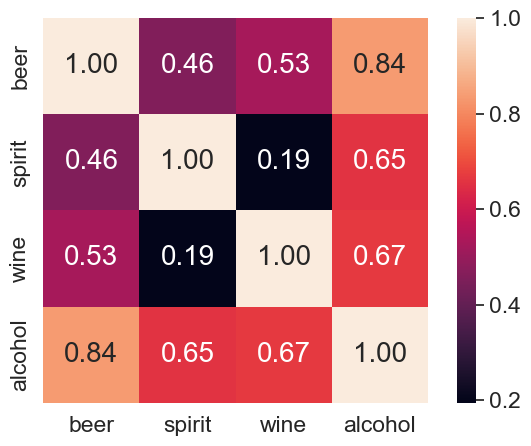

In [9]:
# 상관관계 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values, 
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size' : 20},
    xticklabels = cols_view,
    yticklabels = cols_view
)

plt.tight_layout()
plt.show